# **1. Perkenalan Dataset**

Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error

# **3. Memuat Dataset**

In [2]:
df = pd.read_csv("./car_price_dataset.csv")

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB
None
Summary Statistics:
               count          mean           std     min       25%       50%  \
Year         10000.0    2011.54370      6.897699  2000.0   2006.00    2012.0   
Engine_Size  10000.0       3.00056      1.149324     1.0      2.00       3.0   
Mileage      10

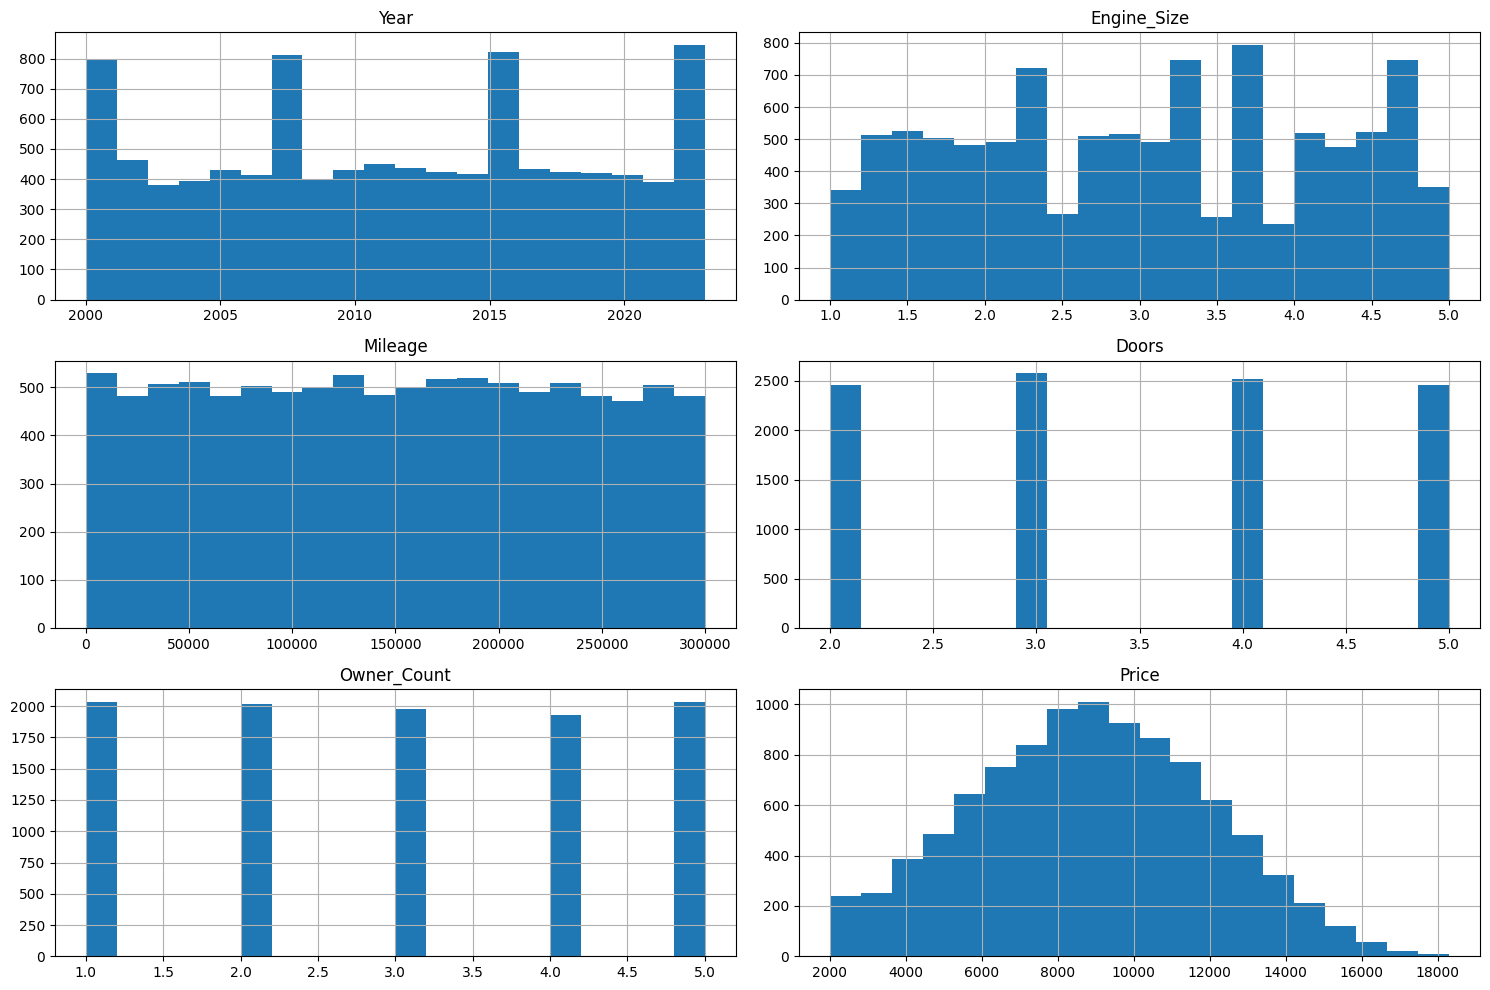

Boxplots of Numerical Variables:


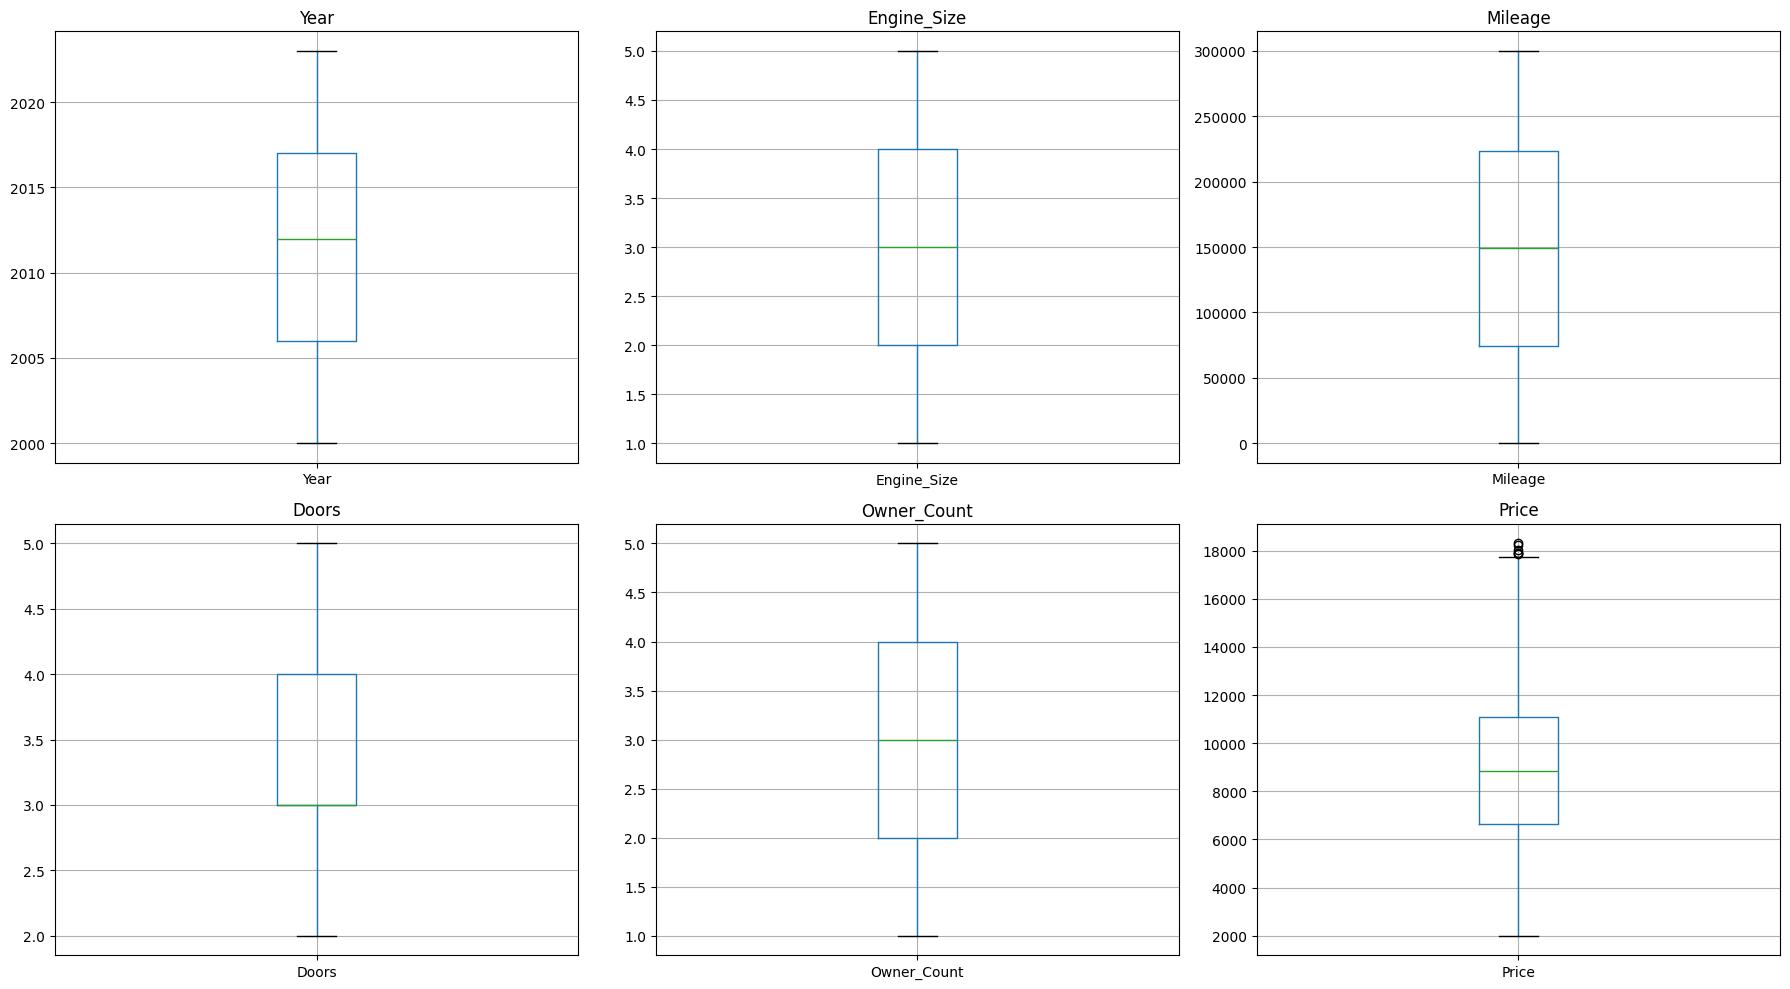

Count Outliers in Numerical Variables:
Year: 0 outliers
Engine_Size: 0 outliers
Mileage: 0 outliers
Doors: 0 outliers
Owner_Count: 0 outliers
Price: 6 outliers
Correlation Heatmap:


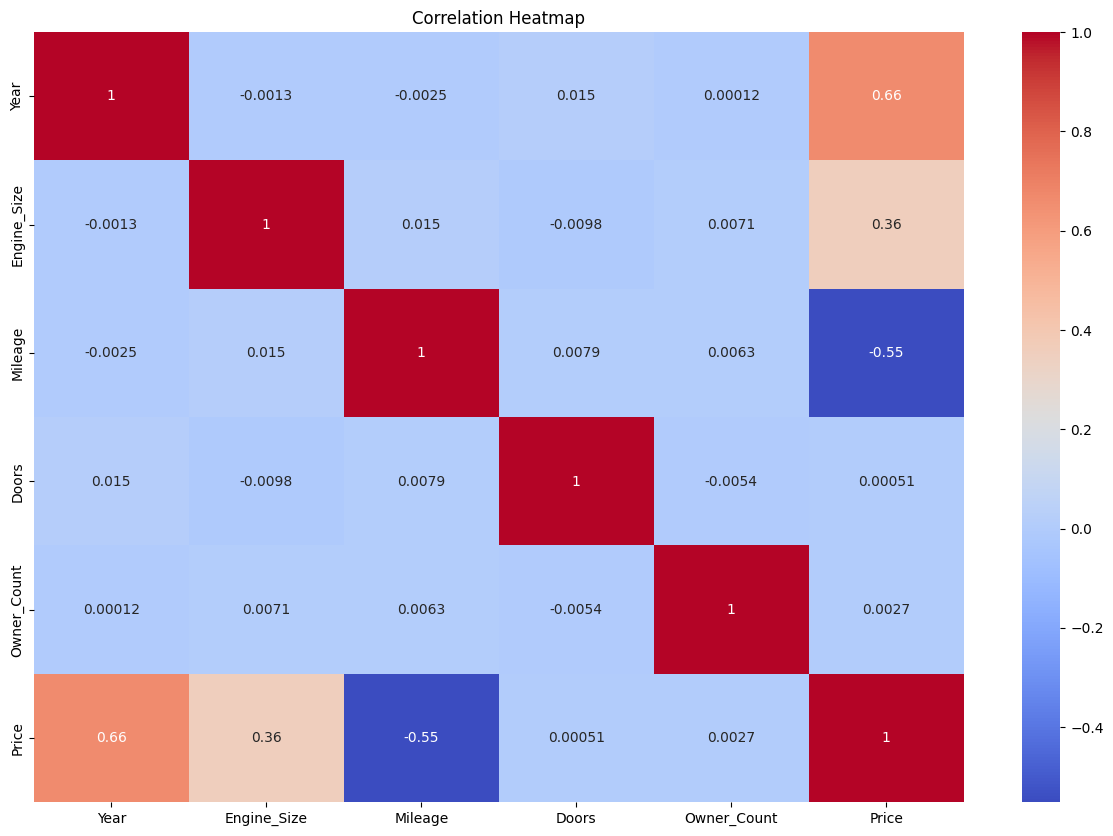

In [3]:
print("Data Types and Non-Null Counts:")
print(df.info())

print("Summary Statistics:")
print(df.describe().T)

print("Null Values:")
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])

print("Distribution of Numerical Variables:")
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns].hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

print("Boxplots of Numerical Variables:")
n_cols = 3
n_rows = -(-len(numerical_columns) // n_cols)  # Ceiling division

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

# Plot individual boxplots
for i, col in enumerate(numerical_columns):
    df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(col)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

print("Count Outliers in Numerical Variables:")
for col in numerical_columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    print(f"{col}: {outliers_count} outliers")

print("Correlation Heatmap:")
plt.figure(figsize=(15, 10))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

=== After Preprocessing ===
Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         9994 non-null   int64  
 1   Model         9994 non-null   int64  
 2   Year          9994 non-null   float64
 3   Engine_Size   9994 non-null   float64
 4   Fuel_Type     9994 non-null   int64  
 5   Transmission  9994 non-null   int64  
 6   Mileage       9994 non-null   float64
 7   Doors         9994 non-null   float64
 8   Owner_Count   9994 non-null   float64
 9   Price         9994 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 858.9 KB
None
Summary Statistics:
   Brand  Model      Year  Engine_Size  Fuel_Type  Transmission   Mileage  \
0      6     24  0.869565         0.80          0             1  0.966648   
1      2     19  0.521739         0.25          2             0  0.017775   
2      7     1

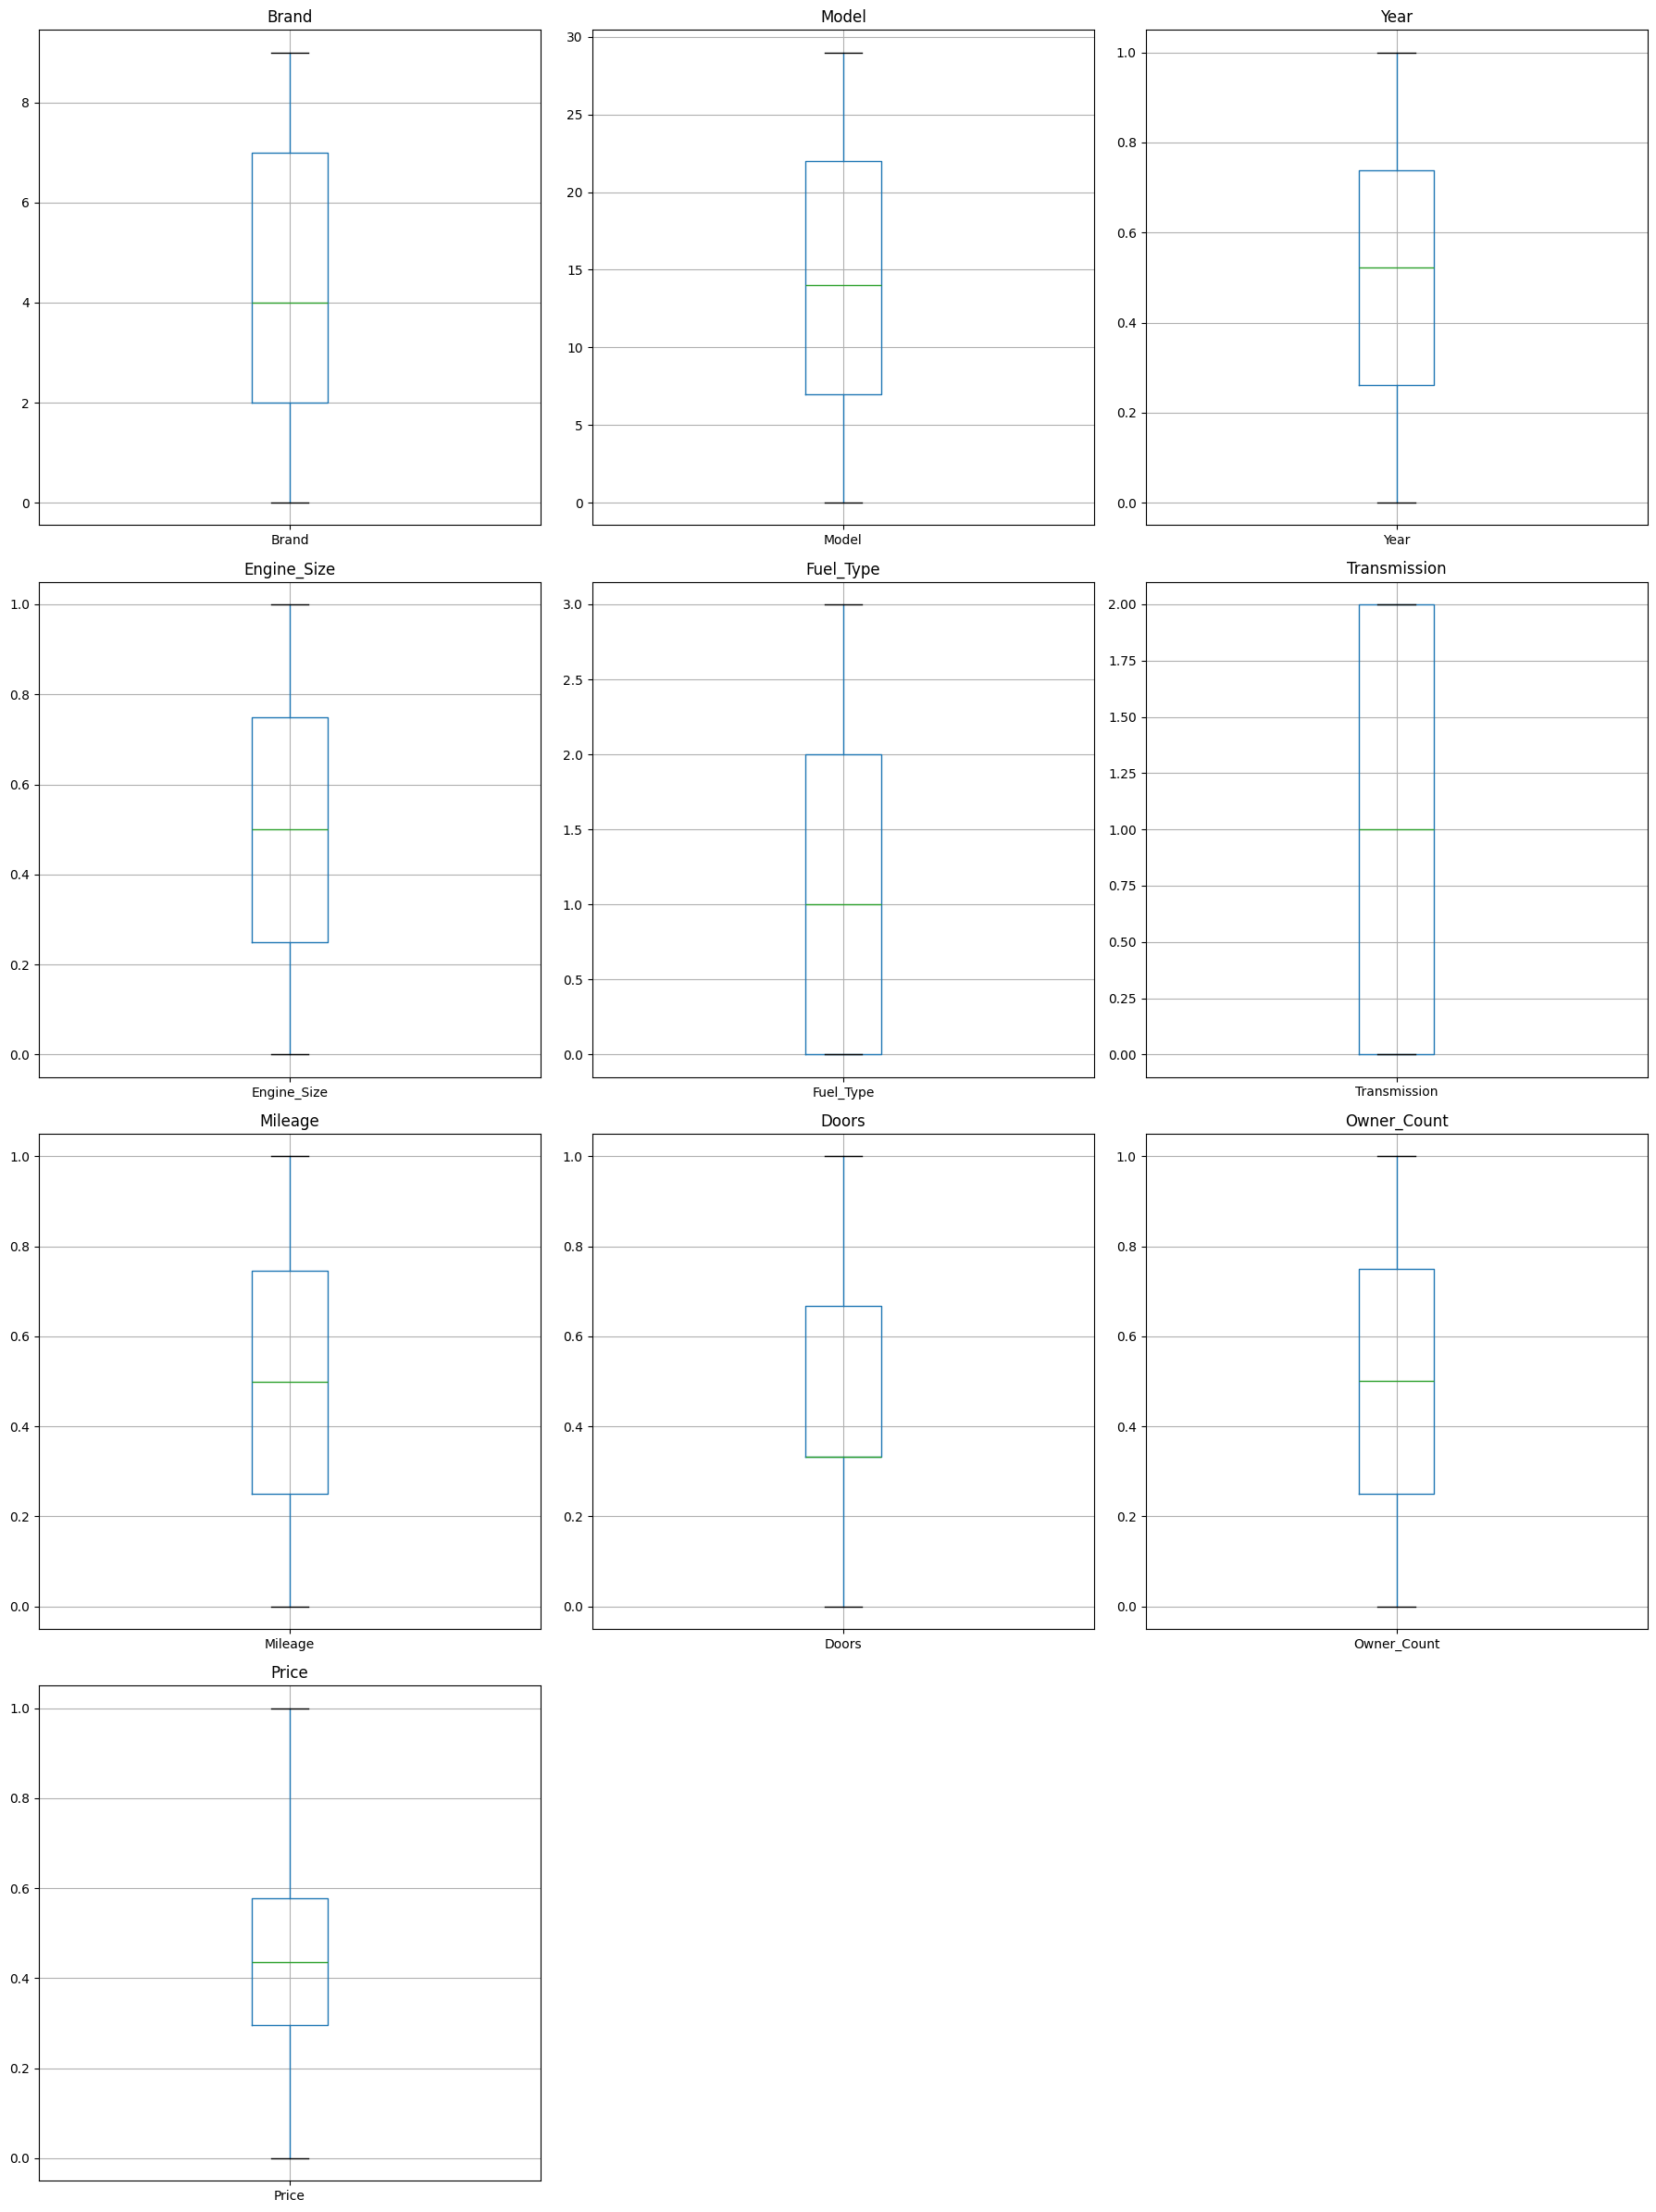

Train: 5996, Validation: 1999, Test: 1999


In [4]:
# Label Encoding
colsEncoder = ['Brand', 'Model','Fuel_Type','Transmission']

le = LabelEncoder()

# Create a dictionary to store label encoders
label_encoders = {}

for col in colsEncoder:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Delete outliers
for col in numerical_columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# min max scaling
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print("=== After Preprocessing ===")
print("Data Types and Non-Null Counts:")
print(df.info())

print("Summary Statistics:")
print(df.head(5))

# Get all numeric columns including Brand and Model which are now numeric after encoding
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

print("Boxplots of Numerical Variables:")
n_cols = 3
n_rows = -(-len(numerical_cols) // n_cols)  # Ceiling division

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows))
axes = axes.flatten()

# Plot individual boxplots
for i, col in enumerate(numerical_cols):
    df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(col)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Data Splitting
X = df.drop('Price', axis=1)
y = df['Price'] 

train_val_X, test_X, train_val_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)


train_X, val_X, train_y, val_y = train_test_split(train_val_X, train_val_y, test_size=0.25, random_state=42)

print(f"Train: {len(train_X)}, Validation: {len(val_X)}, Test: {len(test_X)}")

# **6. Training Model**

In [5]:
modelLinear=LinearRegression()
modelXgboost=XGBRegressor()
modelRandomForest = RandomForestRegressor()

# Linear regression
modelLinear.fit(train_X, train_y)
y_trainLinear = modelLinear.predict(val_X)

# Random Forest
modelRandomForest.fit(train_X, train_y)
y_trainRandomForest = modelRandomForest.predict(val_X)

# XGBoost
modelXgboost.fit(train_X, train_y)
y_trainXgboost = modelXgboost.predict(val_X)

# Calculate all metrics
metrics = {
    'Linear Regression': {
        'Training R²': r2_score(train_y, modelLinear.predict(train_X)),
        'Validation R²': r2_score(val_y, y_trainLinear),
        'Training MSE': mean_squared_error(train_y, modelLinear.predict(train_X)),
        'Validation MSE': mean_squared_error(val_y, y_trainLinear),
        'Training RMSE': root_mean_squared_error(train_y, modelLinear.predict(train_X)),
        'Validation RMSE': root_mean_squared_error(val_y, y_trainLinear)
    },
    'Random Forest': {
        'Training R²': r2_score(train_y, modelRandomForest.predict(train_X)),
        'Validation R²': r2_score(val_y, y_trainRandomForest),
        'Training MSE': mean_squared_error(train_y, modelRandomForest.predict(train_X)),
        'Validation MSE': mean_squared_error(val_y, y_trainRandomForest),
        'Training RMSE': root_mean_squared_error(train_y, modelRandomForest.predict(train_X)),
        'Validation RMSE': root_mean_squared_error(val_y, y_trainRandomForest)
    },
    'XGBoost': {
        'Training R²': r2_score(train_y, modelXgboost.predict(train_X)),
        'Validation R²': r2_score(val_y, y_trainXgboost),
        'Training MSE': mean_squared_error(train_y, modelXgboost.predict(train_X)),
        'Validation MSE': mean_squared_error(val_y, y_trainXgboost),
        'Training RMSE': root_mean_squared_error(train_y, modelXgboost.predict(train_X)),
        'Validation RMSE': root_mean_squared_error(val_y, y_trainXgboost)
    }
}

# Print comparison table
print("\n=== Model Performance Comparison ===")
print("=" * 100)
print(f"{'Model':<20} {'Training R²':>12} {'Validation R²':>15} {'Training MSE':>15} {'Validation MSE':>15} {'Training RMSE':>15} {'Validation RMSE':>15}")
print("-" * 100)

for model_name, metric in metrics.items():
    print(f"{model_name:<20} {metric['Training R²']:>12.4f} {metric['Validation R²']:>15.4f} {metric['Training MSE']:>15.4f} {metric['Validation MSE']:>15.4f} {metric['Training RMSE']:>15.4f} {metric['Validation RMSE']:>15.4f}")

print("=" * 100)


=== Model Performance Comparison ===
Model                 Training R²   Validation R²    Training MSE  Validation MSE   Training RMSE Validation RMSE
----------------------------------------------------------------------------------------------------
Linear Regression          0.9162          0.9196          0.0033          0.0031          0.0574          0.0559
Random Forest              0.9956          0.9689          0.0002          0.0012          0.0132          0.0348
XGBoost                    0.9988          0.9931          0.0000          0.0003          0.0068          0.0164


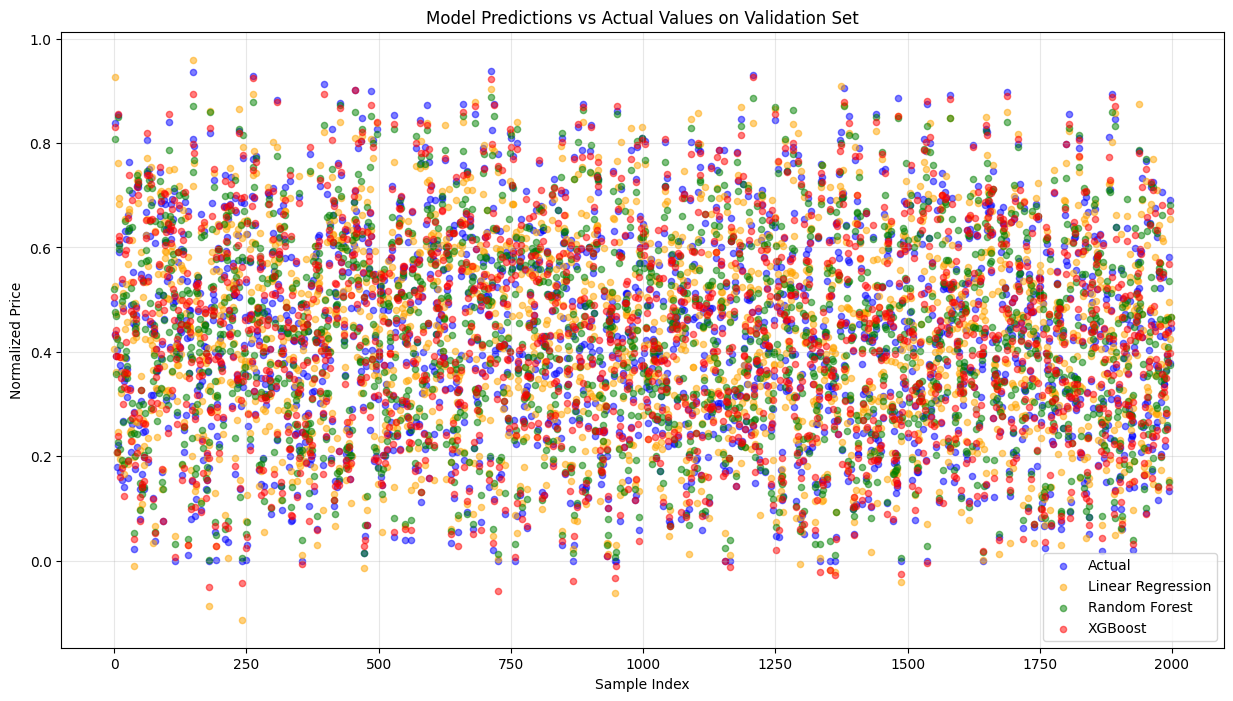


=== Validation Set Metrics ===
Linear Regression R²: 0.9196
Random Forest R²: 0.9689
XGBoost R²: 0.9931


In [6]:
# Plot Actual vs Predicted

plt.figure(figsize=(15, 8))

# Create scatter plots instead of line plots for better visualization
plt.scatter(range(len(val_y)), val_y, label='Actual', color='blue', alpha=0.5, s=20)
plt.scatter(range(len(val_y)), y_trainLinear, label='Linear Regression', color='orange', alpha=0.5, s=20)
plt.scatter(range(len(val_y)), y_trainRandomForest, label='Random Forest', color='green', alpha=0.5, s=20)
plt.scatter(range(len(val_y)), y_trainXgboost, label='XGBoost', color='red', alpha=0.5, s=20)

plt.title('Model Predictions vs Actual Values on Validation Set')
plt.xlabel('Sample Index')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Add evaluation metrics
print("\n=== Validation Set Metrics ===")
print("Linear Regression R²:", round(r2_score(val_y, y_trainLinear), 4))
print("Random Forest R²:", round(r2_score(val_y, y_trainRandomForest), 4))
print("XGBoost R²:", round(r2_score(val_y, y_trainXgboost), 4))

# **7. Testing Model**


=== Test Set Evaluation ===
Model                          R²             MSE            RMSE
--------------------------------------------------------------------------------
Linear Regression          0.9109          0.0034          0.0583
Random Forest              0.9681          0.0012          0.0349
XGBoost                    0.9929          0.0003          0.0165


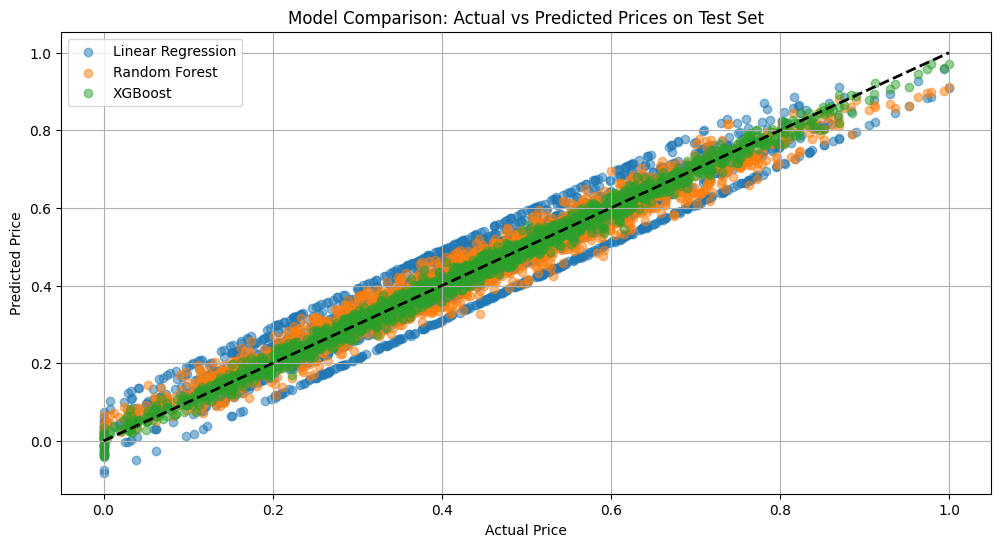

In [7]:
# Test all models
test_predictions = {
    'Linear Regression': modelLinear.predict(test_X),
    'Random Forest': modelRandomForest.predict(test_X),
    'XGBoost': modelXgboost.predict(test_X)
}

# Calculate test metrics for all models
print("\n=== Test Set Evaluation ===")
print("=" * 80)
print(f"{'Model':<20} {'R²':>12} {'MSE':>15} {'RMSE':>15}")
print("-" * 80)

for model_name, predictions in test_predictions.items():
    r2 = r2_score(test_y, predictions)
    mse = mean_squared_error(test_y, predictions)
    rmse = root_mean_squared_error(test_y, predictions)
    print(f"{model_name:<20} {r2:>12.4f} {mse:>15.4f} {rmse:>15.4f}")

print("=" * 80)

# Visualize predictions vs actual values
plt.figure(figsize=(12, 6))
plt.scatter(test_y, test_predictions['Linear Regression'], alpha=0.5, label='Linear Regression')
plt.scatter(test_y, test_predictions['Random Forest'], alpha=0.5, label='Random Forest')
plt.scatter(test_y, test_predictions['XGBoost'], alpha=0.5, label='XGBoost')
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=2)
plt.xlabel('Actual Price') 
plt.ylabel('Predicted Price')
plt.title('Model Comparison: Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()

# **8. Revert Preprocessing**

In [8]:

# Get original values by inverse transforming
original_values = pd.DataFrame(scaler.inverse_transform(df[numerical_columns]), 
                             columns=numerical_columns, 
                             index=df.index)

# Replace scaled values with original values in the dataframe
df[numerical_columns] = original_values

print("=== After reverting min-max scaling ===")
print(df[numerical_columns].describe())

# Label Encoding Reversion
for col in colsEncoder:
    df[col] = label_encoders[col].inverse_transform(df[col].astype(int))


print("=== After Label Encoding Reversion ===")
print(df[colsEncoder].head())    

=== After reverting min-max scaling ===
              Year  Engine_Size        Mileage        Doors  Owner_Count  \
count  9994.000000  9994.000000    9994.000000  9994.000000  9994.000000   
mean   2011.537823     2.999590  149321.466680     3.496498     2.990694   
std       6.895499     1.148962   86282.667676     1.110090     1.422755   
min    2000.000000     1.000000      25.000000     2.000000     1.000000   
25%    2006.000000     2.000000   74760.000000     3.000000     2.000000   
50%    2012.000000     3.000000  149674.000000     3.000000     3.000000   
75%    2017.000000     4.000000  223627.750000     4.000000     4.000000   
max    2023.000000     5.000000  299947.000000     5.000000     5.000000   

              Price  
count   9994.000000  
mean    8847.447969  
std     3105.371856  
min     2000.000000  
25%     6644.500000  
50%     8857.000000  
75%    11081.000000  
max    17719.000000  
=== After Label Encoding Reversion ===
        Brand   Model Fuel_Type    Tra

# **9. Kesimpulan dan Rekomendasi** 

Tulis Disini